In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [14]:
df=pd.read_excel(r"C:\Users\sivag\DS\Datasets\Copper_Set.xlsx")
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [4]:
#checking null values
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [5]:
# checking unique values(taking unique values will help in learning than going with result of other having same value)
df.nunique()


id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [6]:
#converting data types
df['quantity tons']=pd.to_numeric(df['quantity tons'],errors='coerce')
df['item_date1']=pd.to_datetime(df['item_date'],format="%Y%m%d",errors='coerce').dt.date
df['delivery_date1']=pd.to_datetime(df['delivery date'],format="%Y%m%d",errors='coerce').dt.date

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              181671 non-null  object 
 1   item_date       181672 non-null  float64
 2   quantity tons   181672 non-null  float64
 3   customer        181672 non-null  float64
 4   country         181645 non-null  float64
 5   status          181671 non-null  object 
 6   item type       181673 non-null  object 
 7   application     181649 non-null  float64
 8   thickness       181672 non-null  float64
 9   width           181673 non-null  float64
 10  material_ref    103754 non-null  object 
 11  product_ref     181673 non-null  int64  
 12  delivery date   181672 non-null  float64
 13  selling_price   181672 non-null  float64
 14  item_date1      181670 non-null  object 
 15  delivery_date1  181670 non-null  object 
dtypes: float64(9), int64(1), object(6)
memory usage: 22.2+ M

In [8]:
df.isnull().sum()

id                    2
item_date             1
quantity tons         1
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref      77919
product_ref           0
delivery date         1
selling_price         1
item_date1            3
delivery_date1        3
dtype: int64

In [9]:
#to check the null value data
null_mask = df['quantity tons'].isnull()
null_rows = df[null_mask]
df[null_mask]

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date1,delivery_date1
173086,3C0A018F-4A85-4D96-A1AA-72BF0F7DC6DD,20200714.0,NaN,30157111.0,78.0,Won,W,41.0,0.5,1000.0,NaN,164141591,20200801.0,672.0,2020-07-14,2020-08-01


In [7]:
#replacing material_Ref value to null
df["material_ref"]=df["material_ref"].apply(lambda x: np.nan if str(x).startswith("00000") else x)
     

In [11]:
df.isnull().sum()

id                     2
item_date              1
quantity tons          1
customer               1
country               28
status                 2
item type              0
application           24
thickness              1
width                  0
material_ref      100645
product_ref            0
delivery date          1
selling_price          1
item_date1             3
delivery_date1         3
dtype: int64

In [8]:
#dropping id and material_ref column
df.drop(columns=['id','material_ref'],inplace=True)


In [13]:
df.isnull().sum()

item_date          1
quantity tons      1
customer           1
country           28
status             2
item type          0
application       24
thickness          1
width              0
product_ref        0
delivery date      1
selling_price      1
item_date1         3
delivery_date1     3
dtype: int64

In [9]:

df.describe().T # T refers to transponse the dataframe

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181672.0,5.874926e+03,2.349081e+06,-2000.00,1.097030e+01,3.036464e+01,6.716061e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,2.020110e+07,2.021010e+07,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [10]:
#replacing negative values with null
df['quantity tons']=df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price']=df['selling_price'].apply(lambda x: np.nan if x<=0 else x)

In [16]:
df.nunique()

item_date            252
quantity tons     181668
customer            1169
country               17
status                 9
item type              7
application           30
thickness            594
width               1386
product_ref           33
delivery date         28
selling_price       9789
item_date1           250
delivery_date1        26
dtype: int64

In [17]:
df.isnull().sum()

item_date          1
quantity tons      5
customer           1
country           28
status             2
item type          0
application       24
thickness          1
width              0
product_ref        0
delivery date      1
selling_price      8
item_date1         3
delivery_date1     3
dtype: int64

In [11]:
#handling null values
#object datatype and mode
df['item_date1'].fillna(df['item_date1'].mode().iloc[0],inplace=True)
df['delivery_date1'].fillna(df['delivery_date1'].mode().iloc[0],inplace=True)
df['status'].fillna(df['status'].mode().iloc[0],inplace=True)
df['item_date'].fillna(df['item_date'].mode().iloc[0],inplace=True)
df['delivery date'].fillna(df['delivery date'].mode().iloc[0],inplace=True)

In [19]:
df.isnull().sum()

item_date          0
quantity tons      5
customer           1
country           28
status             0
item type          0
application       24
thickness          1
width              0
product_ref        0
delivery date      0
selling_price      8
item_date1         0
delivery_date1     0
dtype: int64

In [12]:
#numerical data type and null
#numerical column and median()
df["quantity tons"].fillna(df["quantity tons"].median(),inplace=True)
df["customer"].fillna(df["customer"].median(),inplace=True)
df["country"].fillna(df["country"].median(),inplace=True)
df["application"].fillna(df["application"].median(),inplace=True)
df["thickness"].fillna(df["thickness"].median(),inplace=True)
df["selling_price"].fillna(df["selling_price"].median(),inplace=True)

In [21]:
df.isnull().sum()
     

item_date         0
quantity tons     0
customer          0
country           0
status            0
item type         0
application       0
thickness         0
width             0
product_ref       0
delivery date     0
selling_price     0
item_date1        0
delivery_date1    0
dtype: int64

# Encoding

In [22]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date1,delivery_date1
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01


In [13]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [14]:
df['status']=df['status'].map({'Won':1,'Draft':2,'To be approved':3,'Lost':0,'Not lost for AM':4,'Wonderful':5,'Revised':6,'Offered':7,'Offerable':8})

In [15]:
df['status'].unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 8], dtype=int64)

In [16]:
df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [17]:
df['item type']=OrdinalEncoder().fit_transform(df[['item type']]) #[[]] is used bcoz ordinal encoder used 2D array

In [18]:
df["item type"].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


In [20]:
df.to_csv("Industrial_Copper_proper.csv",index= False)

## Handling Skewness using Log Transformation

In [36]:
#detecting the skewness
def plot(df,column):
    #distplot
    plt.figure(figsize=(10,5))
    plt.subplot(1,3,1)
    sns.distplot(df[column]) 
    plt.title("Distplot of"+" "+column)
   
    #histogram plot
    plt.subplot(1,3,2)
    sns.histplot(df,x=column,kde=True,bins=30,color="salmon")
    plt.title("Histplot of"+" "+column)

    #Boxplot
    plt.subplot(1,3,3)
    sns.boxplot(df,x=column)
    plt.title("Box plot of"+" "+column)


In [32]:
columns=["quantity tons","customer","status","item type","application","thickness","width","product_ref","selling_price"]

In [ ]:
for i in columns:
    plot(df,i)

#skewed columns- quantity tons,customer, thickness,selling price

In [41]:
df1=df.copy()
df1.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date1', 'delivery_date1'],
      dtype='object')

In [47]:
#removing skewness using log transformation
df1["quantity_tons_log"]=np.log(df1["quantity tons"])
df1["customer_log"]=np.log(df1["customer"])
df1["thickness_log"]=np.log(df1["thickness"])
df1["selling_price_log"]=np.log(df1["selling_price"])

In [ ]:
skewed_col=["quantity_tons_log","customer_log","thickness_log","selling_price_log"]
for i in skewed_col:
    plot(df1,i)

# Outliers

In [ ]:
df2=df1.copy()

In [58]:
df2.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date1', 'delivery_date1',
       'customer_log', 'thickness_log', 'selling_price_log',
       'quantity_tons_log'],
      dtype='object')

In [66]:
def outlier(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower_threshold=q3+(1.5*iqr)
    upper_threshold=q1-(1.5*iqr)

    df[column]=df[column].clip(lower_threshold,upper_threshold) #clip used to convert values above and below threshold values to upper and lower threshold


In [67]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


In [68]:
outlier_col=["quantity_tons_log","customer_log","thickness_log","selling_price_log","width","application"]
for i in outlier_col:
    outlier(df2,i)

In [ ]:
for i in outlier_col:
    plot(df2,i)

In [70]:
df2.describe().T #diff when outliers are removed

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.560516e+01,1.771817e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,8.750000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.297046e+03,2.489619e+02,7.000000e+02,1.180000e+03,1.250000e+03,1.500000e+03,1.980000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


In [71]:
# removing the skewed columns from dataframe
df3=df2.drop(columns=["quantity tons","customer","thickness","selling_price"])

In [73]:
df3.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date1,delivery_date1,customer_log,thickness_log,selling_price_log,quantity_tons_log
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,17.221905,0.693147,6.749931,3.991779
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,17.223450,-0.223144,6.953684,6.643822
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,17.221827,-0.967584,6.468211,5.956169
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,17.228293,0.832909,6.643790,5.310301
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,17.223735,1.386294,6.357842,6.666354


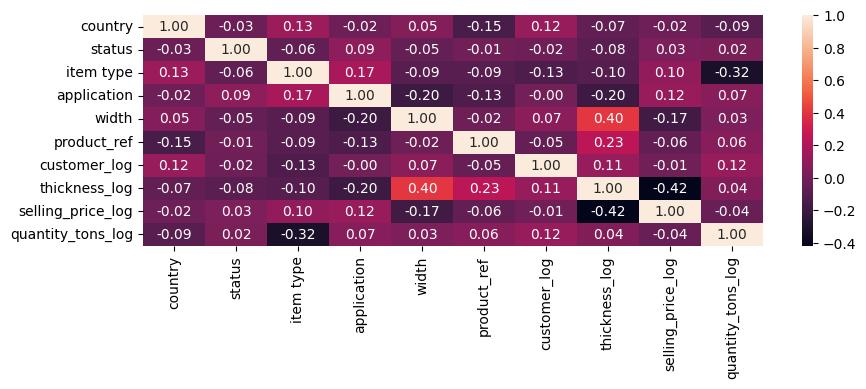

In [74]:
#Correlation using heatmap

corr=df3.drop(columns=["item_date","delivery date","item_date1","delivery_date1"]).corr()
plt.figure(figsize=(10,3))
sns.heatmap(corr,annot=True,fmt=".02f")
plt.show()


In [ ]:
# the high correlations are "-0.42", "0.40", "-0.32", "-0.20","0.23"

In [ ]:
#Handling negative deliver date

In [75]:
df4=df3.copy()
df4.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date1,delivery_date1,customer_log,thickness_log,selling_price_log,quantity_tons_log
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,17.221905,0.693147,6.749931,3.991779
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,17.223450,-0.223144,6.953684,6.643822
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,17.221827,-0.967584,6.468211,5.956169
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,17.228293,0.832909,6.643790,5.310301
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,17.223735,1.386294,6.357842,6.666354


In [76]:
df4.dtypes

item_date            float64
country              float64
status                 int64
item type            float64
application          float64
width                float64
product_ref            int64
delivery date        float64
item_date1            object
delivery_date1        object
customer_log         float64
thickness_log        float64
selling_price_log    float64
quantity_tons_log    float64
dtype: object

In [89]:
#changing object to datetime
df4["delivery_date1"]=pd.to_datetime(df4["delivery_date1"])
df4["item_date1"]=pd.to_datetime(df4["item_date1"])

In [90]:
df4

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date1,delivery_date1,customer_log,thickness_log,selling_price_log,quantity_tons_log,date_difference
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,17.221905,0.693147,6.749931,3.991779,91
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,17.223450,-0.223144,6.953684,6.643822,0
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,17.221827,-0.967584,6.468211,5.956169,-90
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,17.228293,0.832909,6.643790,5.310301,-90
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,17.223735,1.386294,6.357842,6.666354,-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,17.223381,-0.040822,6.381816,4.629691,-1
181669,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,17.223381,-0.051293,6.378426,5.337954,-1
181670,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,17.223381,-0.342490,6.428105,1.443523,-1
181671,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,17.223381,-0.162519,6.398595,3.413291,-1


In [87]:
df4.dtypes

item_date                   float64
country                     float64
status                        int64
item type                   float64
application                 float64
width                       float64
product_ref                   int64
delivery date               float64
item_date1           datetime64[ns]
delivery_date1       datetime64[ns]
customer_log                float64
thickness_log               float64
selling_price_log           float64
quantity_tons_log           float64
date_difference               int64
dtype: object

In [84]:
#identifying difference between item and delivery date
df4["date_difference"]=(df4["delivery_date1"]-df4["item_date1"]).dt.days

In [86]:
df4["date_difference"]

0         91
1          0
2        -90
3        -90
4        -31
          ..
181668    -1
181669    -1
181670    -1
181671    -1
181672    -1
Name: date_difference, Length: 181673, dtype: int64

In [91]:
#Handling the difference since date_difference is negative
#creating 3 columns by splitting date to predict
df4["item_date1_day"]=df4["item_date1"].dt.day
df4["item_date1_month"]=df4["item_date1"].dt.month
df4["item_date1_year"]=df4["item_date1"].dt.year

In [92]:
df4.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date1,delivery_date1,customer_log,thickness_log,selling_price_log,quantity_tons_log,date_difference,item_date1_day,item_date1_month,item_date1_year
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,17.221905,0.693147,6.749931,3.991779,91,1,4,2021
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,17.223450,-0.223144,6.953684,6.643822,0,1,4,2021
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,17.221827,-0.967584,6.468211,5.956169,-90,1,4,2021
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,17.228293,0.832909,6.643790,5.310301,-90,1,4,2021
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,17.223735,1.386294,6.357842,6.666354,-31,1,4,2021


In [93]:
#creating 2 data frames with positive and negative based on date difference
df4_pos=df4[df4['date_difference']>=0]
df4_pos.reset_index(drop=True,inplace=True)

In [94]:
df4_pos.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date1,delivery_date1,customer_log,thickness_log,selling_price_log,quantity_tons_log,date_difference,item_date1_day,item_date1_month,item_date1_year
165560,20200702.0,25.0,0,3.0,15.0,1980.0,640665,20200801.0,2020-07-02,2020-08-01,17.224270,1.791759,6.313548,3.472467,30,2,7,2020
165561,20200702.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,17.222079,1.348073,6.126869,4.196171,30,2,7,2020
165562,20200702.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,17.222079,1.766442,6.124683,4.156686,30,2,7,2020
165563,20200702.0,30.0,0,3.0,10.0,1500.0,640665,20200801.0,2020-07-02,2020-08-01,17.222079,2.060514,6.126869,4.025862,30,2,7,2020
165564,20200702.0,30.0,0,3.0,10.0,1830.0,640665,20200801.0,2020-07-02,2020-08-01,17.222079,1.348073,6.131226,5.328963,30,2,7,2020


In [95]:
df4_neg=df4[df4['date_difference']<0]
df4_neg.reset_index(drop=True,inplace=True)

In [96]:
df4_neg.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date1,delivery_date1,customer_log,thickness_log,selling_price_log,quantity_tons_log,date_difference,item_date1_day,item_date1_month,item_date1_year
16103,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,17.223381,-0.040822,6.381816,4.629691,-1,2,7,2020
16104,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,17.223381,-0.051293,6.378426,5.337954,-1,2,7,2020
16105,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,17.223381,-0.342490,6.428105,1.443523,-1,2,7,2020
16106,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,17.223381,-0.162519,6.398595,3.413291,-1,2,7,2020
16107,20200702.0,25.0,1,5.0,41.0,1240.0,164141591,20200701.0,2020-07-02,2020-07-01,17.223381,-0.342490,6.408529,6.008043,-1,2,7,2020


In [36]:

# importing the model to find the delivery date prediction
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [11]:
#find the best algorithm for the delivery date prediction
def accuracy_date_prediction(df,models):
    x=df.drop(columns=["item_date1","delivery_date1","date_difference"])
    y=df["date_difference"]
    #train test split
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
    model=models().fit(x_train,y_train)
    y_pred=model.predict(x_test)
    #checking the accuracy score
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    mae=mean_absolute_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    metric={"R2_score":r2,
           "Mean_squared_error":mse,
            "Root_mean_squared_error":rmse,
            "Mean_absolute_error":mae,
            "Model":models
           }
    return metric

In [ ]:
print(accuracy_date_prediction(df4_pos,DecisionTreeRegressor))
print(accuracy_date_prediction(df4_pos,RandomForestRegressor))
print(accuracy_date_prediction(df4_pos,AdaBoostRegressor))
print(accuracy_date_prediction(df4_pos,ExtraTreesRegressor))
print(accuracy_date_prediction(df4_pos,GradientBoostingRegressor))
print(accuracy_date_prediction(df4_pos,XGBRegressor))

In [112]:
#Using Random forest 
def Randomforest(train_df,test_df):
    x=train_df.drop(columns=["item_date1","delivery_date1","date_difference"])
    y=train_df['date_difference']
    #train test splitting
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
    #model
    model=RandomForestRegressor().fit(x_train,y_train)
    data=test_df.drop(columns=["item_date1","delivery_date1","date_difference"])
    y_pred=model.predict(data)
    return y_pred

In [114]:
date_differ=Randomforest(df4_pos,df4_neg)

In [115]:
date_differ

array([16.36, 16.4 ,  0.  , ..., 30.  , 30.  , 30.  ])

In [116]:
#datatype conversion
date_difference1=[]
for i in date_differ:
    date=int(round(i,0))
    date_difference1.append(date)


In [117]:
df4_neg['date_difference']=pd.DataFrame(date_difference1)

C:\Users\sivag\AppData\Local\Temp\ipykernel_16720\427710436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_neg['date_difference']=pd.DataFrame(date_difference1)


In [118]:
df4_neg.isna().sum()

item_date            0
country              0
status               0
item type            0
application          0
width                0
product_ref          0
delivery date        0
item_date1           0
delivery_date1       0
customer_log         0
thickness_log        0
selling_price_log    0
quantity_tons_log    0
date_difference      0
item_date1_day       0
item_date1_month     0
item_date1_year      0
dtype: int64

In [119]:
#finding the delivery date post predicting the date difference
def find_delivery_date(item_date,date_difference):
    date=item_date+pd.to_timedelta(date_difference,unit="D")
    return date

In [ ]:
df4_neg['delivery_date1']=find_delivery_date(df4_neg["item_date1"],df4_neg["date_difference"])

In [123]:
#concatenating data frames
df_final=pd.concat([df4_pos,df4_neg],axis=0,ignore_index=True)

In [124]:
df_final.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date1,delivery_date1,customer_log,thickness_log,selling_price_log,quantity_tons_log,date_difference,item_date1_day,item_date1_month,item_date1_year
181668,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-08-01,17.223381,-0.040822,6.381816,4.629691,30,2,7,2020
181669,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-08-01,17.223381,-0.051293,6.378426,5.337954,30,2,7,2020
181670,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,17.223381,-0.342490,6.428105,1.443523,30,2,7,2020
181671,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,17.223381,-0.162519,6.398595,3.413291,30,2,7,2020
181672,20200702.0,25.0,1,5.0,41.0,1240.0,164141591,20200701.0,2020-07-02,2020-08-01,17.223381,-0.342490,6.408529,6.008043,30,2,7,2020


In [125]:
#creating 3 columns by splitting delivery date to predict
df_final["delivery_date1_day"]=df_final["delivery_date1"].dt.day
df_final["delivery_date1_month"]=df_final["delivery_date1"].dt.month
df_final["delivery_date1_year"]=df_final["delivery_date1"].dt.year

In [126]:
df_final.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date1,delivery_date1,...,thickness_log,selling_price_log,quantity_tons_log,date_difference,item_date1_day,item_date1_month,item_date1_year,delivery_date1_day,delivery_date1_month,delivery_date1_year
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,...,0.693147,6.749931,3.991779,91,1,4,2021,1,7,2021
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,...,-0.223144,6.953684,6.643822,0,1,4,2021,1,4,2021
2,20210401.0,25.0,1,5.0,41.0,1265.0,1668701718,20210401.0,2021-04-01,2021-04-01,...,0.405465,6.890609,5.419608,0,1,4,2021,1,4,2021
3,20210401.0,30.0,2,5.0,41.0,1125.0,611993,20210701.0,2021-04-01,2021-07-01,...,-0.967584,5.975038,1.259203,91,1,4,2021,1,7,2021
4,20210401.0,38.0,1,3.0,10.0,1275.0,1668701376,20210701.0,2021-04-01,2021-07-01,...,-0.510826,7.217443,4.235147,91,1,4,2021,1,7,2021


In [ ]:
df_final.columns

In [128]:
df_final.drop(columns=["item_date","delivery date","item_date1","delivery_date1","date_difference"],inplace=True)

In [129]:
df_final.columns

Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'customer_log', 'thickness_log', 'selling_price_log',
       'quantity_tons_log', 'item_date1_day', 'item_date1_month',
       'item_date1_year', 'delivery_date1_day', 'delivery_date1_month',
       'delivery_date1_year'],
      dtype='object')

In [ ]:
#creating csv file
df_final.to_csv("Industrial copper modeling data.csv",index=False)

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv(r"C:\Users\sivag\DS\Industrial copper modeling data.csv")
df

,country,status,item type,application,width,product_ref,customer_log,thickness_log,selling_price_log,quantity_tons_log,item_date1_day,item_date1_month,item_date1_year,delivery_date1_day,delivery_date1_month,delivery_date1_year
0,28.0,1,5.0,10.0,1500.0,1670798778,17.221905,0.693147,6.749931,3.991779,1,4,2021,1,7,2021
1,25.0,1,5.0,41.0,1210.0,1668701718,17.223450,-0.223144,6.953684,6.643822,1,4,2021,1,4,2021
2,25.0,1,5.0,41.0,1265.0,1668701718,17.223450,0.405465,6.890609,5.419608,1,4,2021,1,4,2021
3,30.0,2,5.0,41.0,1125.0,611993,17.223667,-0.967584,5.975038,1.259203,1,4,2021,1,7,2021
4,38.0,1,3.0,10.0,1275.0,1668701376,17.228025,-0.510826,7.217443,4.235147,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,25.0,1,5.0,41.0,1220.0,164141591,17.223381,-0.040822,6.381816,4.629691,2,7,2020,1,8,2020
181669,25.0,1,5.0,41.0,1500.0,164141591,17.223381,-0.051293,6.378426,5.337954,2,7,2020,1,8,2020
181670,25.0,1,5.0,41.0,1250.0,164141591,17.223381,-0.342490,6.428105,1.443523,2,7,2020,1,8,2020
181671,25.0,1,5.0,41.0,1250.0,164141591,17.223381,-0.162519,6.398595,3.413291,2,7,2020,1,8,2020


In [31]:
df[df["status"]==0]

,country,status,item type,application,width,product_ref,customer_log,thickness_log,selling_price_log,quantity_tons_log,item_date1_day,item_date1_month,item_date1_year,delivery_date1_day,delivery_date1_month,delivery_date1_year
161,78.0,0,5.0,10.0,1500.0,1668701718,17.224127,0.000000,7.133296,2.165480,1,4,2021,1,7,2021
164,77.0,0,3.0,10.0,1500.0,164141591,17.222226,0.000000,7.110696,3.677655,1,4,2021,1,8,2021
165,78.0,0,5.0,10.0,1500.0,1668701718,17.224127,1.386294,7.078342,2.438388,1,4,2021,1,7,2021
166,77.0,0,3.0,10.0,1250.0,164141591,17.222226,-0.223144,7.130099,3.628480,1,4,2021,1,8,2021
169,78.0,0,5.0,10.0,1500.0,1668701718,17.224127,-0.223144,7.157735,2.331328,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181352,25.0,0,3.0,41.0,1315.0,164141591,17.223450,0.405465,6.553933,3.279620,2,7,2020,1,8,2020
181354,25.0,0,3.0,41.0,1315.0,1668701718,17.223450,0.405465,6.566672,3.095458,2,7,2020,1,8,2020
181356,25.0,0,3.0,41.0,1200.0,164141591,17.223450,0.405465,6.541030,3.056519,2,7,2020,1,8,2020
181533,25.0,0,3.0,10.0,1150.0,1668701718,17.223300,0.336472,6.586172,4.634669,2,7,2020,1,8,2020


#Classification Method- Predict(Won/Lose)

In [6]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.combine import SMOTETomek

import pickle

In [7]:
df_class=df.copy()

In [8]:
df_c=df_class[(df_class['status']==1)|(df_class['status']==0)] #filtering the columns to keep only won and lose

In [9]:
df_c.tail()

,country,status,item type,application,width,product_ref,customer_log,thickness_log,selling_price_log,quantity_tons_log,item_date1_day,item_date1_month,item_date1_year,delivery_date1_day,delivery_date1_month,delivery_date1_year
181668,25.0,1,5.0,41.0,1220.0,164141591,17.223381,-0.040822,6.381816,4.629691,2,7,2020,1,8,2020
181669,25.0,1,5.0,41.0,1500.0,164141591,17.223381,-0.051293,6.378426,5.337954,2,7,2020,1,8,2020
181670,25.0,1,5.0,41.0,1250.0,164141591,17.223381,-0.342490,6.428105,1.443523,2,7,2020,1,8,2020
181671,25.0,1,5.0,41.0,1250.0,164141591,17.223381,-0.162519,6.398595,3.413291,2,7,2020,1,8,2020
181672,25.0,1,5.0,41.0,1240.0,164141591,17.223381,-0.342490,6.408529,6.008043,2,7,2020,1,8,2020


In [10]:
df_c['status'].value_counts() #do sampling to make the data balanced

status
1    116012
0     34438
Name: count, dtype: int64

In [11]:
x=df_c.drop(columns=["status"],axis=1)
y=df_c["status"]

In [12]:
x_new,y_new= SMOTETomek().fit_resample(x,y)

In [13]:
y_new.value_counts()

status
1    115031
0    115031
Name: count, dtype: int64

In [14]:
#doing prediction for balanced data
def accuracy_check(x,y,models):
    #train test split
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
    
    model=models().fit(x_train,y_train)
    
    y_trainpred=model.predict(x_train)
    y_testpred=model.predict(x_test)
    
    #checking the accuracy_score
    accuracy_train=accuracy_score(y_train,y_trainpred)
    accuracy_test=accuracy_score(y_test,y_testpred)

    metrics={"Model": models.__name__,
            "Accuracy_Train":accuracy_train,
            "Accuracy_Test":accuracy_test}
    return metrics

In [15]:
print(accuracy_check(x,y,DecisionTreeClassifier))
print(accuracy_check(x,y,RandomForestClassifier))
print(accuracy_check(x,y,ExtraTreesClassifier))
print(accuracy_check(x,y,AdaBoostClassifier))
print(accuracy_check(x,y,GradientBoostingClassifier))
print(accuracy_check(x,y,XGBClassifier))

{'Model': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9490196078431372}
{'Model': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9695247590561649}
{'Model': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9728148886673313}


C:\Users\sivag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'Model': 'AdaBoostClassifier', 'Accuracy_Train': 0.8139747424393486, 'Accuracy_Test': 0.811897640412097}
{'Model': 'GradientBoostingClassifier', 'Accuracy_Train': 0.834230641409106, 'Accuracy_Test': 0.8342971086739781}
{'Model': 'XGBClassifier', 'Accuracy_Train': 0.9450897308075773, 'Accuracy_Test': 0.9321369225656364}


In [16]:
print(accuracy_check(x_new,y_new,DecisionTreeClassifier))
print(accuracy_check(x_new,y_new,RandomForestClassifier))
print(accuracy_check(x_new,y_new,ExtraTreesClassifier))
print(accuracy_check(x_new,y_new,AdaBoostClassifier))
print(accuracy_check(x_new,y_new,GradientBoostingClassifier))
print(accuracy_check(x_new,y_new,XGBClassifier))

{'Model': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.964401364831678}
{'Model': 'RandomForestClassifier', 'Accuracy_Train': 0.9999945666643122, 'Accuracy_Test': 0.982722274139917}
{'Model': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.983852389542086}


C:\Users\sivag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'Model': 'AdaBoostClassifier', 'Accuracy_Train': 0.7758857695505001, 'Accuracy_Test': 0.7712385630148002}
{'Model': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8175322875973247, 'Accuracy_Test': 0.8164431791015583}
{'Model': 'XGBClassifier', 'Accuracy_Train': 0.9517193790783977, 'Accuracy_Test': 0.9451894029948058}


In [17]:
# to reduce overfitting, finding hyperparamaters
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.2)

parameters={"max_depth":[5,10],
           "min_samples_split":[2,5],
           "min_samples_leaf":[1,2],
           "max_features":['sqrt','log2','None']}

gridsearch=GridSearchCV(estimator=RandomForestClassifier(),param_grid=parameters,cv=3,n_jobs=-1)
gridsearch.fit(x_train,y_train)

C:\Users\sivag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
24 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sivag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sivag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Users\sivag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py"

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]})

In [18]:
gridsearch.cv_results_

{'mean_fit_time': array([39.35474459, 38.33969267, 38.01187698, 39.07716743, 41.46141617,
        41.90593847, 40.59860547, 39.20105751,  0.16356587,  0.22413389,
         0.21784973,  0.25982865, 70.48671548, 70.23149602, 69.39216455,
        70.63735938, 70.92226235, 71.01525124, 71.17187913, 70.86109026,
         0.16461651,  0.23002903,  0.21033867,  0.2207919 ]),
 'std_fit_time': array([1.12393285, 1.36635856, 2.47146351, 0.55376176, 1.17878604,
        0.77963062, 0.364238  , 1.22766505, 0.02566357, 0.07405856,
        0.03201669, 0.0251596 , 0.45887747, 0.52468335, 0.59170484,
        1.15243858, 1.38327775, 1.52268698, 0.52529251, 1.06144091,
        0.01499625, 0.03837282, 0.04328075, 0.04811839]),
 'mean_score_time': array([1.4281861 , 1.64730827, 1.42464542, 1.54542589, 1.39789915,
        1.26740106, 1.43511422, 1.32551956, 0.        , 0.        ,
        0.        , 0.        , 1.96883686, 1.94243534, 2.18580055,
        2.17945242, 2.32032537, 2.09768693, 1.98687307, 1.34

In [19]:
gridsearch.best_score_

0.8809121461741358

In [20]:
gridsearch.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

# pass the above hyperparameters and check the accuracy value of the model

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.2)

model=RandomForestClassifier(max_depth=10,max_features="log2",min_samples_leaf=1,min_samples_split=2).fit(x_train,y_train)

y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

#checking the accuracy score of train and test data

accuracy_train=accuracy_score(y_train,y_pred_train)
accuracy_test=accuracy_score(y_test,y_pred_test)

print("Accuracy scores of train and test data")
print("Train_Accuracy",accuracy_train)
print("Test_Accuracy",accuracy_test)
print("Confusion_matrix for Test")
print(confusion_matrix(y_true= y_test, y_pred= y_pred_test))


Accuracy scores of train and test data
Train_Accuracy 0.8889480518774892
Test_Accuracy 0.8842718362201987
Confusion_matrix for Test
[[21277  1653]
 [ 3672 19411]]


In [28]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

FP,TP,threshold= roc_curve(y_true= y_test, y_score=y_pred_test)
print(threshold)
print(FP)
print(TP)
print(" ")
auc_curve= auc(x=FP,y=TP)
print("auc_curve:",auc_curve)

[inf  1.  0.]
[0.         0.07954151 1.        ]
[0.         0.84186937 1.        ]
 
auc_curve: 0.8811639314407741


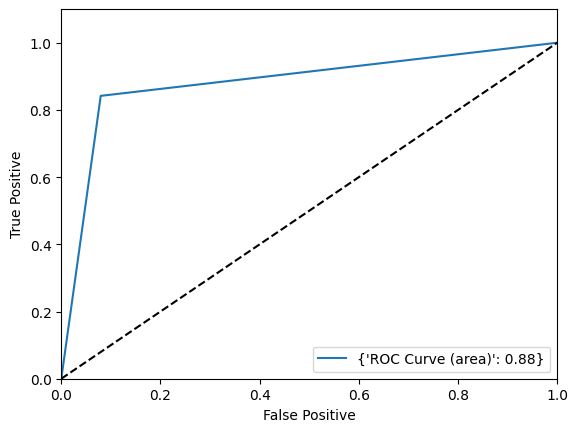

In [31]:
# create a plot for roc and auc curve
import matplotlib.pyplot as plt
roc_point= {"ROC Curve (area)":round(auc_curve,2)}
plt.plot(FP,TP,label= roc_point)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.plot([0,1],[0,1],"k--")
plt.legend(loc= "lower right")
plt.show()

In [22]:
#predicting with user data
import numpy as np

user_data=np.array([[30153963,30,6,28,952,628377,5.9,-0.96,6.46,1,4,2021,1,1,2021]]) #take the values from copper data csv
y_pred_user=model.predict(user_data)
if y_pred_user == 1:
    print("Won")
else:
    print("Lost")

Won


C:\Users\sivag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [24]:
#saving the model using pickle
with open("Classification_Model.pkl","wb") as f:
    pickle.dump(model,f)

In [25]:
with open("Classification_Model.pkl","rb") as f1:
  class_model= pickle.load(f1)

In [26]:
user_data = np.array([[77,3,10,1250,164141591,17.22222576,-0.223,7.13,3.6284,1,4,2021,1,8,2021]]) #take the values from copper data csv
y_pred_user=class_model.predict(user_data)
if y_pred_user == 1:
    print("Won")
else:
    print("Lost")

Lost


C:\Users\sivag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#Regression Model

In [37]:
#run the import statement
df_reg=df.copy()

In [47]:
def accuracy_regressor(df,models):

  x= df.drop(columns=["selling_price_log"], axis=1)
  y= df["selling_price_log"]

  #train test splitting
  x_train,x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2)
  model= models().fit(x_train, y_train)

  y_pred_train= model.predict(x_train)
  y_pred_test= model.predict(x_test)

  r2_train= r2_score(y_train, y_pred_train)
  r2_test= r2_score(y_test, y_pred_test)

  metrics={"Model":models.__name__,
           "R2_Train": r2_train,
           "R2_Test": r2_test}

  return metrics

In [48]:
print(accuracy_regressor(df_reg, DecisionTreeRegressor))
print(accuracy_regressor(df_reg, RandomForestRegressor))
print(accuracy_regressor(df_reg, ExtraTreesRegressor))
print(accuracy_regressor(df_reg, AdaBoostRegressor))
print(accuracy_regressor(df_reg, GradientBoostingRegressor))
print(accuracy_regressor(df_reg, XGBRegressor))

{'Model': 'DecisionTreeRegressor', 'R2_Train': 0.9999059925206459, 'R2_Test': 0.9272121278194259}
{'Model': 'RandomForestRegressor', 'R2_Train': 0.993931488252879, 'R2_Test': 0.9578669298253044}
{'Model': 'ExtraTreesRegressor', 'R2_Train': 0.9999277654530281, 'R2_Test': 0.9553019195463985}
{'Model': 'AdaBoostRegressor', 'R2_Train': 0.7127660598367489, 'R2_Test': 0.7141759966494576}
{'Model': 'GradientBoostingRegressor', 'R2_Train': 0.8887975354090724, 'R2_Test': 0.8895877945255901}
{'Model': 'XGBRegressor', 'R2_Train': 0.9519147574914628, 'R2_Test': 0.9467483579379891}


In [49]:
#training data of models are overfitted, hence finding hyperparamater using Gridsearchcv
x= df_reg.drop(columns=["selling_price_log"], axis=1)
y= df_reg["selling_price_log"]

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2)

parameters= {"max_depth": [4,10],
               "min_samples_split": [2,5],
               "min_samples_leaf": [1,2],
               "max_features": ["sqrt","log2",None]}

reg_gridsearch= GridSearchCV(estimator= RandomForestRegressor(), param_grid= parameters, cv= 3,n_jobs=-1)
reg_gridsearch.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]})

In [50]:
reg_gridsearch.cv_results_

{'mean_fit_time': array([ 28.62729073,  26.73710608,  29.19812059,  25.85821223,
         25.53956008,  25.50711759,  27.86977283,  26.60225073,
        128.64027421, 127.21157511, 130.1457506 , 129.83258454,
         57.24069945,  57.53845533,  58.39975794,  57.70264292,
         68.68426069,  67.6646378 ,  67.24853396,  65.08167823,
        293.1386083 , 295.42676624, 297.30088353, 292.26102042]),
 'std_fit_time': array([3.34990826, 1.98604979, 1.68855317, 3.07918715, 0.78525475,
        0.80222901, 2.24074015, 1.99796989, 2.38704507, 4.5694458 ,
        2.55902116, 1.52229916, 2.67236427, 2.33292616, 1.45451768,
        0.95153702, 0.79917283, 0.90744804, 1.04656657, 0.69226481,
        5.3567079 , 0.76076049, 1.3204726 , 0.9767695 ]),
 'mean_score_time': array([1.70776836, 1.46134671, 1.76538006, 1.59327118, 1.41036876,
        1.34655007, 1.6225961 , 1.87831918, 1.66562939, 1.62751309,
        1.61837546, 2.4691426 , 3.98215795, 5.19316705, 5.12987574,
        3.66058548, 5.874077

In [51]:
reg_gridsearch.best_score_

0.9000504282567977

In [52]:
reg_gridsearch.best_params_

{'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [53]:
# pass the parameters and check the accuracy for both training and testing & overfitting

x = df_reg.drop(columns=['selling_price_log'], axis=1)
y = df_reg['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor(max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test


(0.9072529745809133, 0.8990032253729099)

In [54]:
#predict the selling price with hypertuning parameters and calculating the accuracy using metrics

x = df_reg.drop(columns=['selling_price_log'], axis=1)
y = df_reg['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor(max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

reg_metrics = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

reg_metrics
     

{'R2': 0.9026634800270119,
 'Mean Absolute Error': 0.05482210268067505,
 'Mean Squared Error': 0.006394496755580347,
 'Root Mean Squared Error': 0.07996559732522697}

In [55]:
user_data = np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]]) #take the values from copper data csv
y_pred = model.predict(user_data)
print("Predicted selling price with Log: ",y_pred[0])
print("Predicted selling price without Log: ",np.exp(y_pred[0]))

Predicted selling price with Log:  7.108588938039457
Predicted selling price without Log:  1222.4214161798916


C:\Users\sivag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [56]:
with open("Regression_Model.pkl","wb") as r:
  pickle.dump(model,r)     

In [58]:
with open("Regression_Model.pkl","rb") as r1:
  reg_model=pickle.load(r1)

In [59]:
user_data = np.array([[28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,1,4,2021,1,7,2021]]) #take the values from copper data csv
y_pred = reg_model.predict(user_data)
print("Predicted selling price with Log: ",y_pred[0])
print("Predicted selling price without Log: ",np.exp(y_pred[0]))

Predicted selling price with Log:  6.893795675149565
Predicted selling price without Log:  986.1373796289524


C:\Users\sivag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
